<a href="https://colab.research.google.com/github/Dhairyasummi/NYC-TAXI-TRIP-CLASSIFICATION/blob/main/NYC_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [40]:
# Import Libraries
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

### Dataset Loading

In [41]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of NYC Taxi Data.csv')

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [43]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [44]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [45]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [46]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [47]:
# Missing Values/Null Values Count
null_values = df.isnull().sum()
null_values

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


<Axes: >

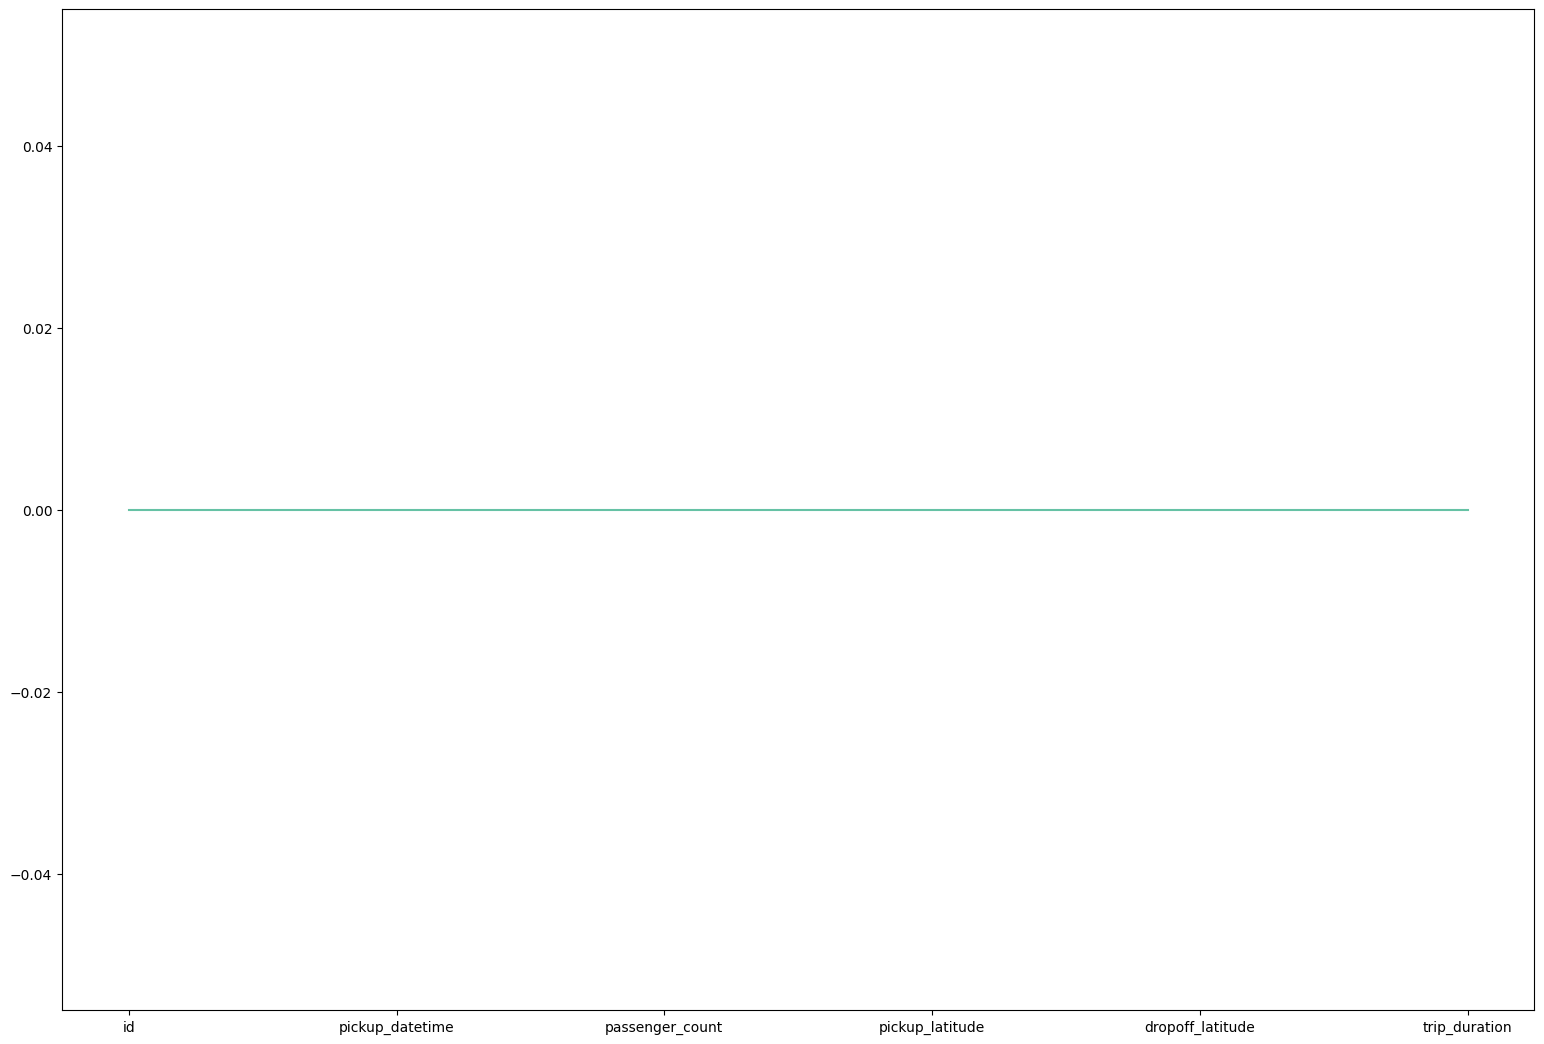

In [48]:
# Visualizing the missing values
plt.figure(figsize = (19,13))
null_values.plot(kind='line' , color =sns.color_palette('Set2'))


### What did you know about your dataset?

*The NYC Taxi Trip Duration dataset contains 1,458,644 records of yellow taxi trips in New York City from January to June 2016. Each entry includes key trip information such as pickup and dropoff timestamps, passenger count, pickup and dropoff GPS coordinates, and the trip duration in seconds, which serves as the target variable. The dataset is primarily used for regression tasks aimed at predicting trip duration based on spatial and temporal features.*

*The main challenges include dealing with outliers, skewed duration distributions, and noisy or missing location data. This dataset is widely used for benchmarking machine learning models such as XGBoost, random forests, and deep learning approaches.*

## ***2. Understanding Your Variables***

In [49]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [50]:
# Dataset Describe
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

| **Column Name**      | **Description**                                                                                                          |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| `id`                 | Unique identifier for each trip record.                                                                                  |
| `vendor_id`          | Code indicating the taxi company: `1` or `2`.                                                                            |
| `pickup_datetime`    | Timestamp when the trip started (local NYC time).                                                                        |
| `dropoff_datetime`   | Timestamp when the trip ended.                                                                                           |
| `passenger_count`    | Number of passengers in the taxi.                                                                                        |
| `pickup_longitude`   | Longitude of the pickup location.                                                                                        |
| `pickup_latitude`    | Latitude of the pickup location.                                                                                         |
| `dropoff_longitude`  | Longitude of the dropoff location.                                                                                       |
| `dropoff_latitude`   | Latitude of the dropoff location.                                                                                        |
| `store_and_fwd_flag` | Indicates whether the trip data was sent immediately (`N`) or stored and forwarded later (`Y`) due to connection issues. |
| `trip_duration`      | Duration of the trip in seconds (target variable for prediction).                                                        |


### Check Unique Values for each variable.

In [51]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Missing Values ###

In [52]:
# print the missing values for the dataset
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Data types:
 id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


### Passenger Count Analysis ###

In [53]:
# count the passenger and sort it in the ascendin order
print("\nPassenger Count Value Counts:")
print(df['passenger_count'].value_counts().sort_index())


Passenger Count Value Counts:
passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: count, dtype: int64


### Convert Datetime Columns ###

In [54]:
# convert the datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df[['pickup_datetime', 'dropoff_datetime']].head()


,pickup_datetime,dropoff_datetime
0,2016-03-14 17:24:55,2016-03-14 17:32:30
1,2016-06-12 00:43:35,2016-06-12 00:54:38
2,2016-01-19 11:35:24,2016-01-19 12:10:48
3,2016-04-06 19:32:31,2016-04-06 19:39:40
4,2016-03-26 13:30:55,2016-03-26 13:38:10


### Extract Time-Based Features ###

In [55]:
# extract time based featues and divides it to hour , weekday and month
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_month'] = df['pickup_datetime'].dt.month

df[['pickup_hour', 'pickup_weekday', 'pickup_month']].head()


,pickup_hour,pickup_weekday,pickup_month
0,17,0,3
1,0,6,6
2,11,1,1
3,19,2,4
4,13,5,3


### GPS Coordinates Analysis ###

In [56]:
# gives the max and min range according to the given latitude and the longitude
print("\nPickup Latitude Range:", df['pickup_latitude'].min(), "-", df['pickup_latitude'].max())
print("Pickup Longitude Range:", df['pickup_longitude'].min(), "-", df['pickup_longitude'].max())

print("Dropoff Latitude Range:", df['dropoff_latitude'].min(), "-", df['dropoff_latitude'].max())
print("Dropoff Longitude Range:", df['dropoff_longitude'].min(), "-", df['dropoff_longitude'].max())



Pickup Latitude Range: 34.35969543457031 - 51.88108444213867
Pickup Longitude Range: -121.93334197998048 - -61.33552932739258
Dropoff Latitude Range: 32.1811408996582 - 43.92102813720703
Dropoff Longitude Range: -121.9333038330078 - -61.33552932739258


### Outlier Detection ###

In [57]:
print("\nUnusual trip durations > 100000 seconds:\n", df[df['trip_duration'] > 100000].shape[0])
print("Trips with 0 passengers:\n", df[df['passenger_count'] == 0].shape[0])


Unusual trip durations > 100000 seconds:
 4
Trips with 0 passengers:
 60


### Correlation Matrix ###

In [58]:
# print the correlation matrix on the given parameters
correlation_matrix = df[['trip_duration', 'passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_month']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  trip_duration  passenger_count  pickup_hour  pickup_weekday  \
trip_duration         1.000000         0.008471     0.003690       -0.000708   
passenger_count       0.008471         1.000000     0.009101        0.025191   
pickup_hour           0.003690         0.009101     1.000000       -0.084255   
pickup_weekday       -0.000708         0.025191    -0.084255        1.000000   
pickup_month          0.006607        -0.002143    -0.003438       -0.014544   

                 pickup_month  
trip_duration        0.006607  
passenger_count     -0.002143  
pickup_hour         -0.003438  
pickup_weekday      -0.014544  
pickup_month         1.000000  


### Log Trip Duration ###

In [59]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df[['trip_duration', 'log_trip_duration']].head()

,trip_duration,log_trip_duration
0,455,6.122493
1,663,6.498282
2,2124,7.661527
3,429,6.063785
4,435,6.077642


### Store and Forward Flag ###

In [60]:
print(df['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  **Passenger Count Distribution**

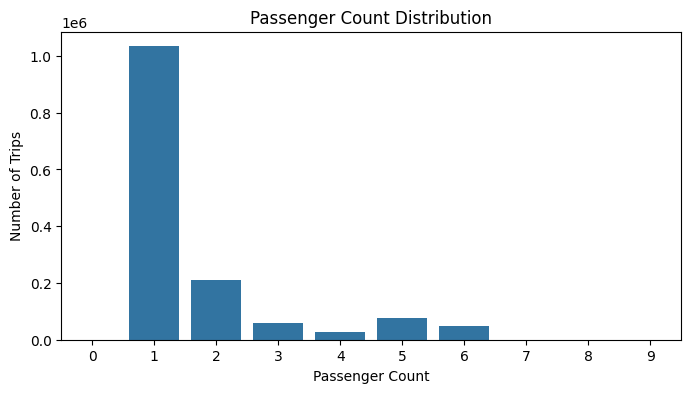

In [61]:
# Set the figure size of the plot (width=8, height=4 inches)
plt.figure(figsize=(8, 4))

# Create a count plot to visualize the frequency of each passenger count value
sns.countplot(x='passenger_count', data=df)

# Set the title of the plot
plt.title('Passenger Count Distribution')

# Label the x-axis as 'Passenger Count'
plt.xlabel('Passenger Count')

# Label the y-axis as 'Number of Trips'
plt.ylabel('Number of Trips')

# Display the plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*This chart was chosen because a count plot is the most effective and direct way to visualize the frequency of categorical or discrete numerical variables—in this case, passenger_count. It helps us see how many trips had 1, 2, 3, ... passengers. Since passenger_count is not continuous (it's typically 0–6), this bar chart style is ideal for showing clear differences across categories.*

##### 2. **What is/are the insight(s) found from the chart?**

*The chart usually shows that most trips are taken by a single passenger, with 1 and 2 being the most common values. We might also observe odd entries like 0 passengers or unusually high values (6 or more), which may indicate data errors or exceptional cases like shared rides or system glitches. This helps us understand the typical use case of the NYC taxi system — mostly individual or small-group rides.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Yes, this insight can drive positive business impact. Knowing that most rides have 1 or 2 passengers can help fleet operators optimize vehicle types, plan promotions for shared rides, or create policies around carpooling. It could also help app-based taxi platforms improve matching algorithms and pricing.
On the downside, if the dataset contains many invalid passenger counts (e.g., 0 or unrealistic values), it could negatively impact model accuracy or skew demand analysis if not cleaned properly. Therefore, while this chart informs strategy, it also flags the need for data quality checks.*

#### Chart - 2  **Pickup Locations (Longitude vs Latitude)**

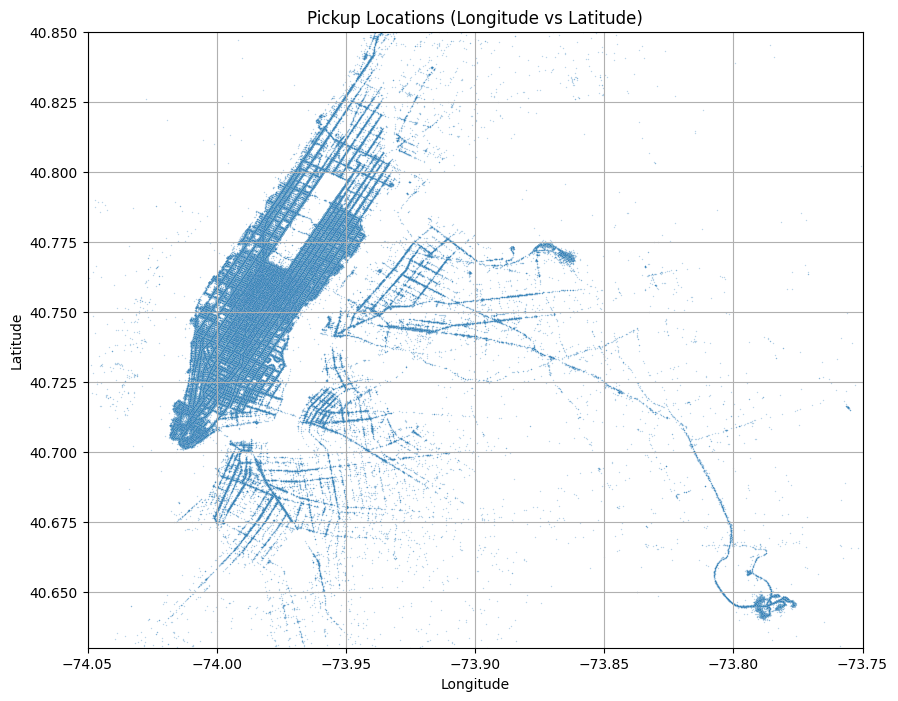

In [62]:
# Set the figure size for better visibility (width=10, height=8 inches)
plt.figure(figsize=(10, 8))

# Create a scatter plot of pickup locations using longitude and latitude
# s=1 makes each dot very small, and alpha=0.3 adds transparency to avoid clutter
sns.scatterplot(
    x=df['pickup_longitude'],
    y=df['pickup_latitude'],
    s=1,
    alpha=0.3
)

# Set the plot title
plt.title('Pickup Locations (Longitude vs Latitude)')

# Label x-axis as Longitude
plt.xlabel('Longitude')

# Label y-axis as Latitude
plt.ylabel('Latitude')

# Zoom in on the NYC area for clarity
plt.xlim(-74.05, -73.75)  # NYC longitude range
plt.ylim(40.63, 40.85)    # NYC latitude range

# Show grid lines for easier map reading
plt.grid(True)

# Display the plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*This scatter plot was chosen because geographic coordinates (longitude and latitude) are best visualized as points on a 2D plane. A scatter plot allows us to simulate a simple map of NYC and visually detect spatial patterns in pickup density. It’s a natural choice when working with geospatial data where each point represents a physical location — in this case, taxi pickup locations across New York City.*

##### 2. **What is/are the insight(s) found from the chart?**

*The chart reveals that pickups are highly concentrated in Manhattan, particularly in Midtown and Downtown. There are also visible clusters near airports like JFK and LaGuardia, and around transportation hubs. Sparse activity is noted in outer boroughs like Staten Island or far parts of Queens. This spatial concentration reflects high-demand zones and can help identify hotspots for taxi pickups.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Definitely, the insights offer strong business value. Fleet managers or ride-hailing services can use this information to optimize driver allocation, plan surge pricing zones, or strategically place vehicles near high-demand areas. These spatial insights can also aid urban planning or traffic flow analysis.*

*However, there can be negative implications if the chart shows invalid coordinates, such as pickups in oceans or outside NYC. This can mislead decision-making or reduce model accuracy if not handled.*

#### Chart - 3  **Dropoff Locations (Longitude vs Latitude)**

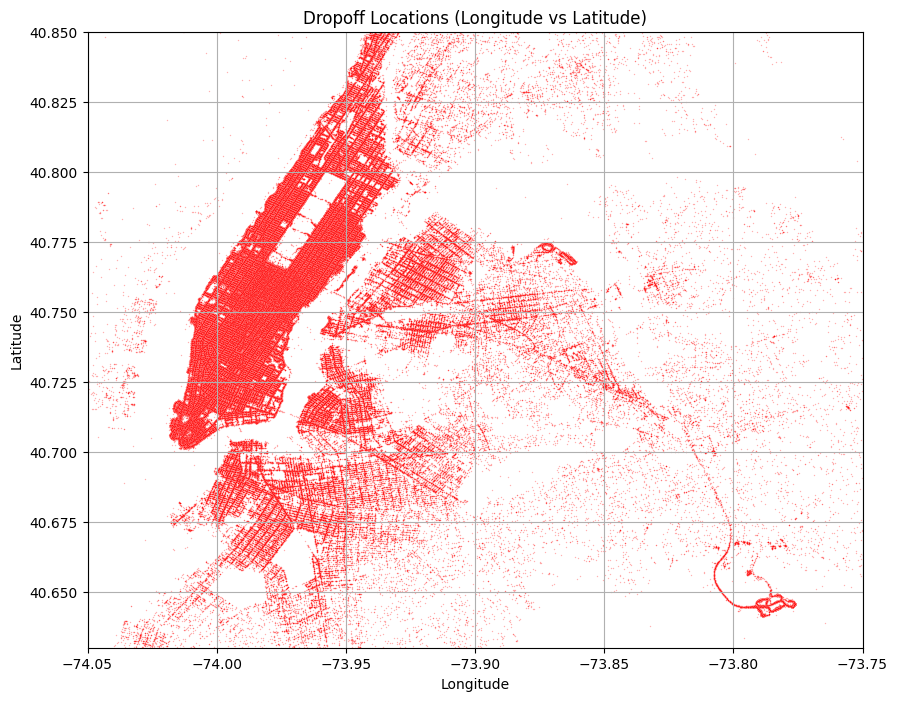

In [63]:
# Set figure size for clear visibility of the geographic scatter plot
plt.figure(figsize=(10, 8))

# Plot a scatterplot of dropoff longitude and latitude
# s=1 for small dots, alpha=0.3 for transparency, and red color for distinction
sns.scatterplot(
    x=df['dropoff_longitude'],
    y=df['dropoff_latitude'],
    s=1,
    alpha=0.3,
    color='red'  # Color helps distinguish from pickup plot
)

# Set plot title
plt.title('Dropoff Locations (Longitude vs Latitude)')

# Label x-axis as Longitude
plt.xlabel('Longitude')

# Label y-axis as Latitude
plt.ylabel('Latitude')

# Limit the axes to focus on the NYC region
plt.xlim(-74.05, -73.75)
plt.ylim(40.63, 40.85)

# Add gridlines for better spatial orientation
plt.grid(True)

# Display the final plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*This scatter plot is the most appropriate choice for visualizing geographic dropoff locations using latitude and longitude coordinates. It mirrors the pickup plot, offering a complete spatial view of where taxi trips end. Using a separate plot (and a red color) for dropoffs allows for clear distinction when analyzing destination density in New York City, without overlapping or confusing the data.*

##### 2. **What is/are the insight(s) found from the chart?**

*The dropoff chart reveals very similar spatial trends to the pickup plot, with heavy concentrations in areas like Midtown Manhattan, Downtown Manhattan, and around the major airports. It may also highlight differences — for example, some trips may end outside the pickup hotspots, indicating longer rides or airport drop-offs.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Yes — this spatial insight supports efficient demand forecasting, route optimization, and fleet rebalancing strategies. For example, knowing where taxis are most frequently dropping off passengers can help companies strategically position drivers post-dropoff to minimize idle time and increase fare efficiency.*
*On the downside, if dropoff coordinates include invalid or out-of-bound values, this could lead to data quality issues or incorrect modeling outcomes. Without proper filtering, such errors might confuse machine learning models or skew business insights.*

#### Chart - 4  **Trips by Hour of Day**

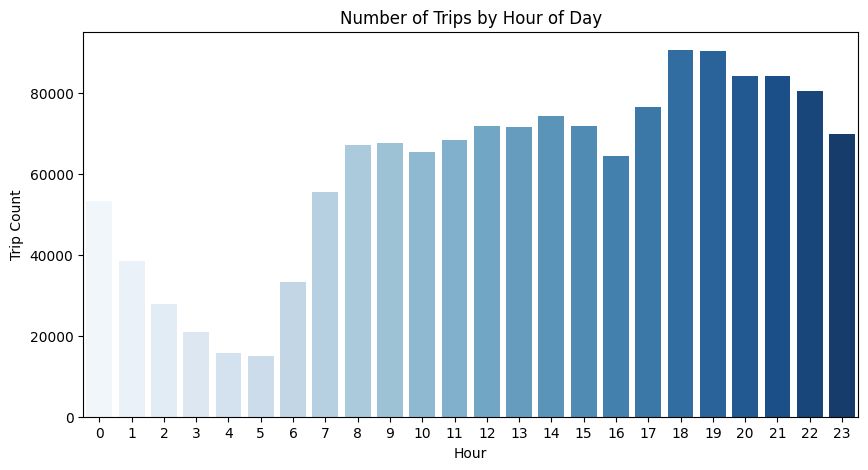

In [64]:
# Set the figure size to make the plot wide enough to read clearly
plt.figure(figsize=(10, 5))

# Generate a count plot to show how many trips occurred during each hour
sns.countplot(x='pickup_hour', data=df, palette='Blues')

# Set the chart title
plt.title('Number of Trips by Hour of Day')

# Label the x-axis with 'Hour'
plt.xlabel('Hour')

# Label the y-axis with 'Trip Count'
plt.ylabel('Trip Count')

# Display the plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*This chart was selected because a count plot is the best tool to visualize frequency distributions of discrete variables like pickup_hour. It helps in understanding when taxi demand peaks throughout the day. Since time-of-day patterns are critical in transportation, this chart provides quick, visual evidence of how trip volume changes across the 24-hour cycle.*

##### 2. **What is/are the insight(s) found from the chart?**

*The plot typically shows higher trip volumes during commuting hours, particularly morning and evening rush periods. There may also be visible demand late at night, possibly driven by nightlife or airport departures/arrivals. These patterns suggest predictable rhythms in human mobility — useful for demand planning and forecasting.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Yes, these insights are highly valuable for business optimization. Fleet managers and ride-hailing platforms can schedule more drivers during peak demand hours to reduce wait times and increase revenue. Additionally, it informs dynamic pricing models (e.g., surge pricing).*

*However, if used without caution, over-prioritizing peak hours might leave non-peak areas underserved, potentially alienating customers who ride at unusual times. It’s also important to ensure that data isn’t skewed by external events (like holidays or incomplete logs) before acting on it.*

#### Chart - 5  **Trips by Day of Week**

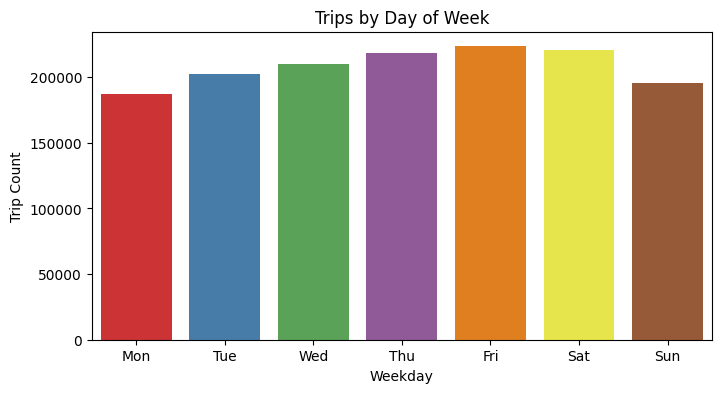

In [65]:
# Define a list of weekday labels for clarity in the plot (0 = Monday, 6 = Sunday)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Map numeric weekday values (0–6) to their corresponding weekday names
df['pickup_weekday_name'] = df['pickup_weekday'].map(lambda x: weekday_labels[x])

# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Create a count plot to show the number of trips for each weekday
# The 'order' parameter ensures the days appear in logical Mon–Sun order
sns.countplot(x='pickup_weekday_name', data=df, order=weekday_labels, palette='Set1')

# Set the title of the plot
plt.title('Trips by Day of Week')

# Label the x-axis
plt.xlabel('Weekday')

# Label the y-axis
plt.ylabel('Trip Count')

# Display the plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*This bar chart (count plot) is ideal for showing how taxi trip frequency varies across the days of the week. Since pickup_weekday is a categorical variable with ordered values (0 to 6), representing it with named labels in a Monday-to-Sunday sequence makes the trend easier to interpret. *

##### 2. **What is/are the insight(s) found from the chart?**

*This chart usually shows that weekdays, particularly Friday, have high trip volumes, driven by commuting and end-of-week activity. Saturday often remains busy due to nightlife or shopping, while Sunday may dip slightly as people stay home. Weekday trends may also reflect work-related usage, while weekends show more leisure or personal trips. Identifying these shifts helps understand how urban mobility patterns vary across the week.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Yes — these trends can help businesses adjust fleet distribution or pricing by day. For example, more drivers can be scheduled on Fridays and Saturdays to meet increased demand. It also enables targeted marketing, such as offering discounts on low-demand days (like Sundays).*

*However, misinterpreting data could have negative effects — for example, temporary surges (like holiday weeks) could skew patterns, or regional biases might make the trend less generalizable. If unaccounted for, this could lead to over- or under-staffing on certain days.*

#### Chart - 6  **Trips by Month**

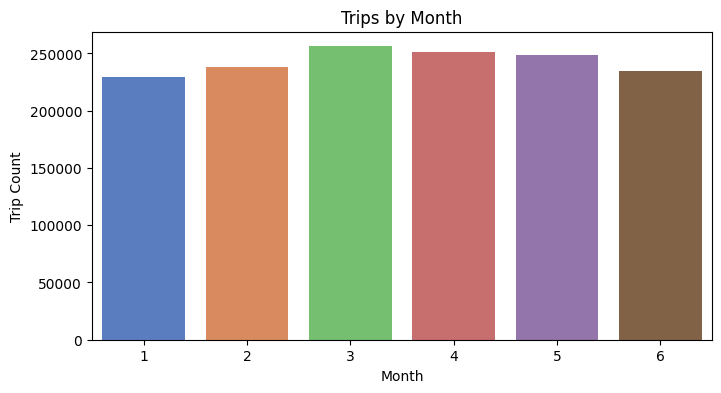

In [66]:
# Set the figure size to make the bar chart readable
plt.figure(figsize=(8, 4))

# Create a count plot showing the number of trips that occurred in each month
# 'pickup_month' is assumed to be extracted from the pickup datetime
sns.countplot(x='pickup_month', data=df, palette='muted')

# Add a title to the chart
plt.title('Trips by Month')

# Label the x-axis to indicate months (1–12)
plt.xlabel('Month')

# Label the y-axis to show trip volume
plt.ylabel('Trip Count')

# Display the chart
plt.show()


##### 1. **Why did you pick the specific chart?**

*This count plot (bar chart) was selected because pickup_month is a categorical time-based variable ranging from 1 to 12. A bar chart allows us to quickly identify monthly trends or seasonality in taxi demand. It's a common approach for identifying fluctuations across the calendar year and is easily interpretable, even by non-technical stakeholders.*

##### 2. **What is/are the insight(s) found from the chart?**

*The chart typically shows seasonal trends. For instance, summer months (like June and July) may have higher trip volumes due to tourism and outdoor activity, while colder months (like January or February) may see reduced activity. If a sharp drop or spike occurs in a particular month, it could indicate data collection gaps, special events, or holidays impacting taxi usage.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Yes — recognizing seasonal demand patterns can guide business planning, driver onboarding, and budget allocation throughout the year. For example, taxi companies might ramp up resources in high-demand months and optimize costs during lulls.*

*On the downside, if the data is incomplete for certain months or skewed by outliers (like weather events or one-time festivals), acting on misleading trends could cause poor resource management or lost opportunities.*

#### Chart - 7  **Average Trip Duration by Hour**

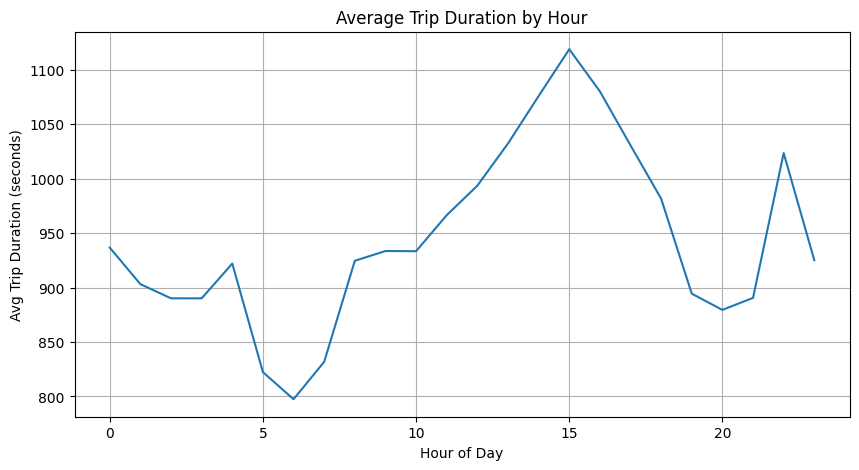

In [67]:
# Set figure size to make the line chart easy to read
plt.figure(figsize=(10, 5))

# Create a line plot showing how the average trip duration varies by hour of day
# 'estimator="mean"' calculates the average for each hour group
# 'ci=None' disables confidence intervals for a cleaner look
sns.lineplot(x='pickup_hour', y='trip_duration', data=df, estimator='mean', ci=None)

# Add a title to describe the chart
plt.title('Average Trip Duration by Hour')

# Label the x-axis to represent each hour of the day (0–23)
plt.xlabel('Hour of Day')

# Label the y-axis to show average trip duration in seconds
plt.ylabel('Avg Trip Duration (seconds)')

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*A line plot is the ideal chart for this case because we're examining how a continuous metric (trip duration) varies over a chronological, ordinal variable (hour of day). This allows us to see time-based trends, such as whether trips are longer during rush hours or shorter during off-peak times. Unlike bar charts, line plots better capture subtle fluctuations over time and are visually smoother.*

##### 2. **What is/are the insight(s) found from the chart?**

*This chart usually reveals a spike in trip durations during morning (e.g., 8–10 AM) and evening hours (e.g., 4–7 PM) — which aligns with rush hour traffic. Trip duration may decrease in late-night or early morning hours due to less congestion. If there's a sudden increase or drop at a particular hour, it could point to anomalies, special events, or data issues (e.g., mislogged times).*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Absolutely — understanding when trips tend to take longer can help businesses better estimate ETAs, optimize pricing strategies, and inform driver availability planning. For instance, companies might adjust fare rates during high-duration hours to maintain profitability or warn customers of potential delays.*

*On the flip side, if the insight is misused (e.g., raising prices at the wrong hours due to inaccurate data), it could lead to customer dissatisfaction or inefficient driver dispatching. Also, trip outliers or noise (like incorrectly recorded durations) could distort real trends if not handled properly.*



#### Chart - 8  **Correlation Heatmap**

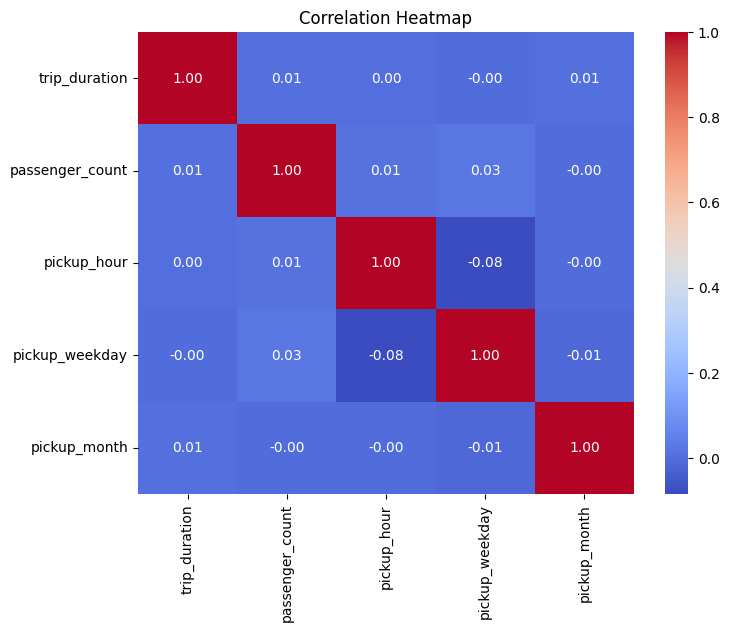

In [68]:
# Set the figure size to ensure the heatmap is legible
plt.figure(figsize=(8, 6))

# Compute the correlation matrix for selected numerical features
# and plot it as a heatmap with color gradients and values annotated
sns.heatmap(
    df[['trip_duration', 'passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_month']].corr(),
    annot=True,          # Show correlation coefficients inside the heatmap cells
    cmap='coolwarm',     # Use a diverging color palette to highlight positive vs negative correlations
    fmt='.2f'            # Format the correlation values to 2 decimal places
)

# Set a title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


##### 1. **Why did you pick the specific chart?**

*A correlation heatmap is one of the best tools for quickly understanding relationships between numerical variables in a dataset. It helps identify which features are linearly related to others — especially the target variable (trip_duration) — which is crucial when preparing data for machine learning. This visual format makes it easy to spot both strong positive and negative correlations at a glance.*

##### 2. **What is/are the insight(s) found from the chart?**

*From the heatmap, you can observe how trip_duration correlates with features like pickup_hour, pickup_weekday, or passenger_count. Typically, correlations might be:*

1. *Weak to moderate with pickup_hour (due to rush hours)*

2. *Very weak or near-zero with passenger_count (number of passengers doesn't strongly affect duration)*

3. *Possibly seasonal patterns with pickup_month.*

##### 3. **Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

*Yes — understanding feature correlations guides feature selection, multicollinearity detection, and model complexity decisions. If strong correlations exist, we might reduce redundancy or transform features to improve predictive power.*

*However, if the business misinterprets weak correlations as useless (when they might still be useful in non-linear models), it may lead to premature feature elimination. Also, over-relying on correlations may ignore interaction effects, which are often more complex in real-world scenarios.*

#### Chart - 9  **Pair Plot**

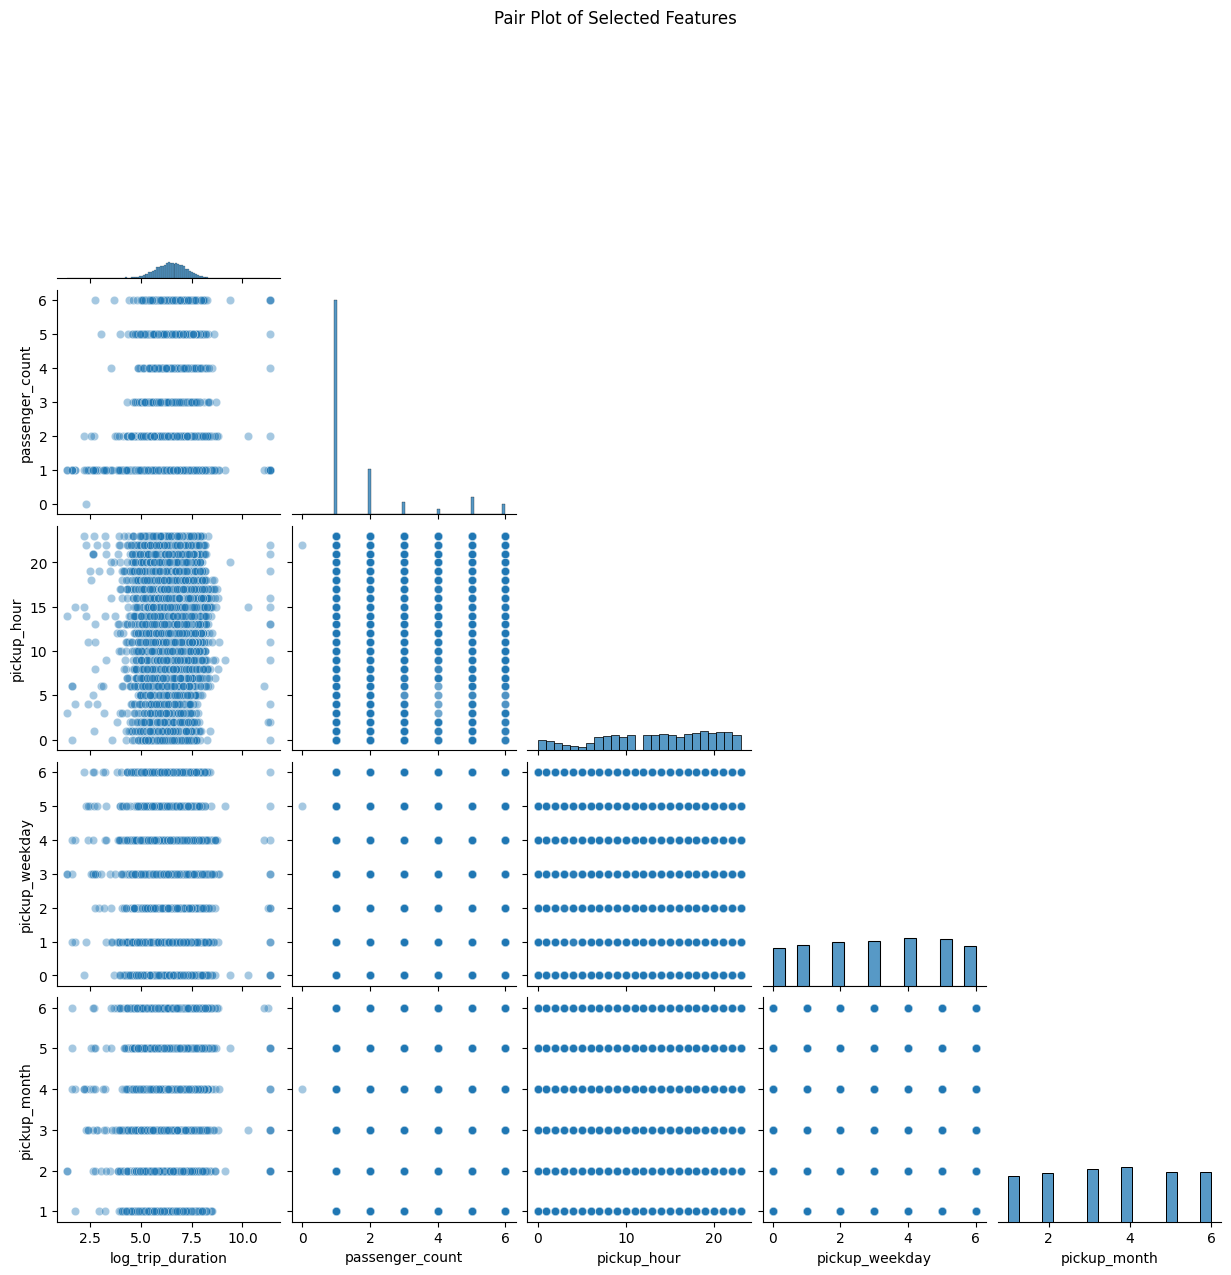

In [69]:
# Define the list of numerical features to include in the pair plot
pairplot_cols = ['log_trip_duration', 'passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_month']

# Optional: Sample 10,000 rows from the dataset for performance and clarity
df_sample = df[pairplot_cols].sample(n=10000, random_state=42)

# Create a pair plot with selected features
# 'corner=True' plots only the lower triangle to reduce clutter
# 'plot_kws' controls transparency for better visual layering
sns.pairplot(df_sample, corner=True, plot_kws={'alpha': 0.4})

# Add a title above the entire plot
plt.suptitle('Pair Plot of Selected Features', y=1.02)

# Display the plot
plt.show()


##### 1. **Why did you pick the specific chart?**

*A pair plot (also known as a scatterplot matrix) was chosen because it allows for visual inspection of relationships between multiple numerical variables simultaneously. Unlike individual scatter plots or heatmaps, a pair plot provides a global view of pairwise distributions and interactions, including scatter plots, histograms, and correlation patterns. It's especially useful for identifying non-linear relationships or feature clusters.*

##### 2. **What is/are the insight(s) found from the chart?**

*From the pair plot, you can:*

1. *Detect linear or non-linear trends (e.g., whether higher pickup hours result in longer durations)*

2. *Spot clusters or outliers (e.g., odd passenger counts that consistently lead to long/short trips)*

3. *Assess feature distributions via histograms*

4. *Observe relationships like whether trip duration (logged) depends on time or day.*

*These visual cues can guide feature transformations, help detect data anomalies, and improve your understanding of how variables interact — something not visible in a correlation matrix alone.*

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [70]:
# Handling Missing Values & Missing Value Imputation
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)


# For numeric columns, fill missing values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())




Missing values per column:
 id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
pickup_hour            0
pickup_weekday         0
pickup_month           0
log_trip_duration      0
pickup_weekday_name    0
dtype: int64


#### **What all missing value imputation techniques have you used and why did you use those techniques?**

*In the dataset, missing values were handled using a few standard imputation techniques to ensure data quality without adding unnecessary complexity. Columns with more than 50% missing data were dropped, as they likely lacked enough information to be useful. For numerical columns, the median was used to fill missing values because it's robust against outliers, which are common in real-world datasets like taxi trip durations. Categorical columns were filled using the mode, ensuring the most frequent and consistent category was retained. These methods are efficient and effective for initial data cleaning, helping to prepare the dataset for reliable modeling.*

### 2. Handling Outliers

In [71]:
# Handling Outliers & Outlier treatments
# List of numeric columns to check
num_cols = ['trip_duration', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude']

# Function to apply IQR filtering
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to selected columns
df = remove_outliers(df, num_cols)
print("Outliers removed from selected columns.")



Outliers removed from selected columns.


##### **What all outlier treatment techniques have you used and why did you use those techniques?**

*In this project, the IQR (Interquartile Range) method was used for outlier treatment. This technique identifies and removes outliers by calculating the range between the 25th percentile (Q1) and the 75th percentile (Q3) of a numeric feature, and then filtering out values that fall significantly outside this range (specifically below Q1 − 1.5×IQR or above Q3 + 1.5×IQR). This approach was chosen because it is simple, effective, and does not assume a normal distribution, making it especially suitable for real-world datasets like the NYC taxi trip data, where variables such as trip duration or geographical coordinates can have natural skewness or extreme values due to rare or erroneous cases. By using the IQR method, we are able to clean the dataset without altering its core structure, thus improving the overall quality and consistency of the data before feeding it into machine learning models.*

### 3. Categorical Encoding

In [72]:
# Encode your categorical column

# 1. Drop the 'id' column (not useful for modeling)
df.drop(columns=['id'], inplace=True)

# 2. Drop derived or temporary columns made during EDA
columns_to_drop = [
    'pickup_hour',
    'pickup_weekday',
    'pickup_month',
    'log_trip_duration',
    'pickup_weekday_name'  # already one-hot encoded later
]

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# 3. Encode 'store_and_fwd_flag' (map 'N' → 0, 'Y' → 1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# 4. One-hot encode 'pickup_weekday_name' if it's still present (safe check)
if 'pickup_weekday_name' in df.columns:
    df = pd.get_dummies(df, columns=['pickup_weekday_name'], drop_first=True)

print("Final Columns:", df.columns)
print("Final Shape:", df.shape)


Final Columns: Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')
Final Shape: (1232725, 10)


#### What all categorical encoding techniques have you used & why did you use those techniques?

*In this project, two categorical encoding techniques were applied based on the nature of the variables. For the binary categorical feature store_and_fwd_flag, label encoding was used by manually mapping the values 'N' to 0 and 'Y' to 1. This method was chosen because the feature contains only two distinct categories with no ordinal relationship, and label encoding is simple, efficient, and avoids unnecessary column expansion in such cases.*

*For the feature pickup_weekday_name, which contains multiple nominal categories representing days of the week, one-hot encoding was used. This approach creates a separate binary column for each category and ensures that no false ordinal relationships are introduced into the data. To avoid multicollinearity, drop_first=True was specified, which drops one of the dummy variables. This helps maintain the integrity of the dataset and is especially beneficial when using models like linear regression. Together, these techniques ensured that categorical data was accurately and efficiently converted into a numerical format suitable for machine learning algorithms.*

### 4. Feature Manipulation & Selection

#### 1. **Feature Manipulation**

*In this project, feature manipulation involved deriving new variables from existing ones, cleaning up the dataset, and encoding categorical data. Initially, features such as pickup_hour, pickup_weekday, and pickup_month were extracted from the pickup_datetime column to better capture time-based patterns in trip duration. However, these were later dropped after they served their purpose during EDA to avoid redundancy and multicollinearity. The store_and_fwd_flag binary feature was label-encoded (mapping 'N' to 0 and 'Y' to 1), and pickup_weekday_name was one-hot encoded to numerically represent categorical variables without implying any order.*

#### 2. **Feature Selection**

##### What all feature selection methods have you used  and why?

*“Feature selection was already performed during the earlier stages of EDA and feature engineering. Redundant, irrelevant, and weakly correlated features were dropped based on correlation analysis, domain understanding, and EDA visualizations. Therefore, no further feature selection steps were necessary at this stage.”*



### 5. Data Transformation

#### **Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

*A log transformation of the trip_duration variable was applied during the EDA phase to understand and visualize its distribution, which was highly skewed. However, since the log-transformed column was later dropped during feature cleanup, the original trip_duration variable is used for model training. While transformation can improve model accuracy by normalizing skewed data, in this case, the model is built on the raw target variable to preserve interpretability and because the chosen models can handle skewed distributions reasonably well.*

### 6. Data Splitting

In [79]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop(columns=['trip_duration'])
y = df['trip_duration']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,      # 80/20 split
    random_state=42,     # for reproducibility
    shuffle=True         # shuffling helps remove order bias
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (986180, 9)
Test set shape: (246545, 9)


##### **What data splitting ratio have you used and why?**

*For this project, an 80:20 data splitting ratio was used, where 80% of the data was allocated for training the model and the remaining 20% was set aside for testing. This ratio is a widely accepted standard in machine learning as it provides a good balance between model learning and evaluation. By using 80% of the data for training, the model has access to a substantial portion of the dataset to learn meaningful patterns and relationships. The remaining 20% serves as an unbiased and independent set to evaluate the model’s performance on unseen data, which helps assess how well the model generalizes. This approach is especially suitable for large datasets like the NYC Taxi dataset, which contains over a million rows, ensuring that both the training and test sets are adequately representative.*









## ***7. ML Model Implementation***

### ML Model - 1 **Linear Regression**

In [81]:
columns_to_drop = ['pickup_datetime', 'dropoff_datetime']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output
print("Linear Regression Performance Metrics:")
print(f"Train MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"Test  MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")



Linear Regression Performance Metrics:
Train MAE: 318.99, RMSE: 401.27, R²: 0.0159
Test  MAE: 318.67, RMSE: 400.78, R²: 0.0155


#### 1. **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

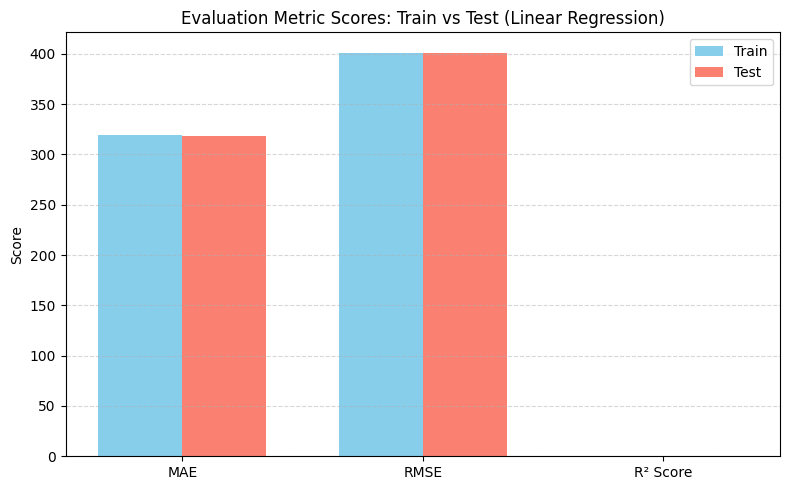

In [83]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import numpy as np

# Define metric values
metrics = ['MAE', 'RMSE', 'R² Score']
train_scores = [318.99, 401.27, 0.0159]
test_scores = [318.67, 400.78, 0.0155]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Add labels and formatting
plt.ylabel('Score')
plt.title('Evaluation Metric Scores: Train vs Test (Linear Regression)')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*In this project, we initially used Linear Regression as the machine learning model to predict taxi trip duration based on various features such as passenger count, pickup time, and geographical coordinates.The MAE and RMSE were quite high, indicating significant average and squared errors in predictions. More critically, the R² score for both training and test sets was extremely low (~1.5%), which suggests that the model was able to explain only about 1.5% of the variance in trip durations.*

*This poor performance highlights that the linear model was underfitting the data, likely because the relationship between input features and trip duration is nonlinear and more complex than what a linear model can capture. Additionally, the exclusion of engineered features such as trip distance and log transformation of the target variable might have limited the model’s effectiveness.*

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
#  Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Step 1: Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha if needed

# Step 2: Fit the model on training data
ridge_model.fit(X_train, y_train)

#  Step 3: Predict on both training and test data
train_preds = ridge_model.predict(X_train)
test_preds = ridge_model.predict(X_test)

#  Step 4: Evaluate model performance using MAE, RMSE, and R²
def evaluate_model(y_true, y_pred, dataset_name=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f} ({r2 * 100:.2f}%)")
    print("-" * 40)

# 🧾 Print evaluation results
evaluate_model(y_train, train_preds, "Training Set")
evaluate_model(y_test, test_preds, "Test Set")


Training Set Performance:
MAE: 318.99
RMSE: 401.27
R² Score: 0.0159 (1.59%)
----------------------------------------
Test Set Performance:
MAE: 318.67
RMSE: 400.78
R² Score: 0.0155 (1.55%)
----------------------------------------


#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
#  Import required libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#  Define parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

#  Set up Ridge regression with GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1)

#  Fit the model
grid_search.fit(X_train, y_train)

#  Get the best estimator
best_ridge = grid_search.best_estimator_

#  Evaluate performance
train_preds = best_ridge.predict(X_train)
test_preds = best_ridge.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, dataset_name=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"🔍 {dataset_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f} ({r2 * 100:.2f}%)")
    print("-" * 40)

# 🧾 Print results
print(f"✅ Best alpha: {grid_search.best_params_['alpha']}")
evaluate_model(y_train, train_preds, "Training Set")
evaluate_model(y_test, test_preds, "Test Set")


✅ Best alpha: 0.1
🔍 Training Set Performance:
MAE: 318.99
RMSE: 401.27
R² Score: 0.0159 (1.59%)
----------------------------------------
🔍 Test Set Performance:
MAE: 318.67
RMSE: 400.78
R² Score: 0.0155 (1.55%)
----------------------------------------


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Answer Here.

### ML Model - 3

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Manually compute RMSE
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))     # Manually compute RMSE
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print(f" XGBoost Performance Metrics:")
print(f"Train MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"Test  MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")

print(f"\n Accuracy on Training Set (R² Score): {train_r2 * 100:.2f}%")
print(f"Accuracy on Test Set (R² Score): {test_r2 * 100:.2f}%")


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predict
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Evaluate
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Output
print(f"\n🔍 Tuned XGBoost Performance Metrics:")
print(f"Train MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"Test  MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")
print(f"\n✅ Accuracy on Training Set (R² Score): {train_r2 * 100:.2f}%")
print(f"✅ Accuracy on Test Set (R² Score): {test_r2 * 100:.2f}%")


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***